We have two kinds of data visualization:

1. Exploratory data visualization: we build graphs for ourselves to explore data and find patterns.
2. Explanatory data visualization: we build graphs for others to communicate and explain the patterns we've found through exploring data.


This notebook contails details about

1. How to visualize time series data with line plots.
2. What are correlations and how to visualize them with scatter plots.
3. How to visualize frequency distributions with bar plots and histograms.
4. How to speed up our exploratory data visualization workflow with the pandas library.
5. How to visualize multiple variables using Seaborn's relational plots.

## Line Graphs and Time Series

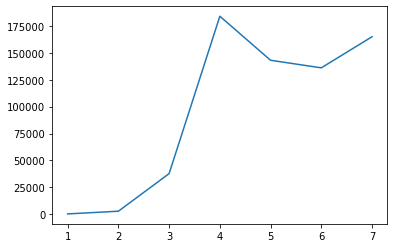

In [1]:
month_number = [1, 2, 3, 4, 5, 6, 7]
new_deaths = [213, 2729, 37718, 184064, 143119, 136073, 165003]

import matplotlib.pyplot as plt
plt.plot(month_number, new_deaths)
plt.show()

## Matplotlib

Matplotlib, a Python library specifically designed for creating visualizations.

A quirk of Matplotlib is that we generally import the pyplot submodule instead of the whole module:import matplotlib.pyplot instead of import matplotlib.

import matplotlib.pyplot as plt

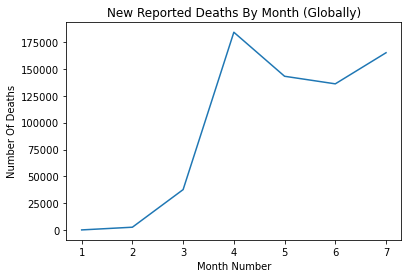

In [2]:
# Customizing a graph

import matplotlib.pyplot as plt

month_number = [1, 2, 3, 4, 5, 6, 7]
new_deaths = [213, 2729, 37718, 184064, 143119, 136073, 165003]
plt.plot(month_number, new_deaths)
plt.title('New Reported Deaths By Month (Globally)')
plt.xlabel('Month Number')
plt.ylabel('Number Of Deaths')
plt.show()

In [3]:
#WHO time series data

import pandas as pd
who_time_series = pd.read_csv('/Users/brindhamanivannan/datasets/WHO_time_series.csv')
who_time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31876 entries, 0 to 31875
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date_reported      31876 non-null  object
 1   Country            31876 non-null  object
 2   New_cases          31876 non-null  int64 
 3   Cumulative_cases   31876 non-null  int64 
 4   New_deaths         31876 non-null  int64 
 5   Cumulative_deaths  31876 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.5+ MB


In [4]:
who_time_series.head()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,China,1,1,0,0
1,2020-01-05,China,0,1,0,0
2,2020-01-06,China,3,4,0,0
3,2020-01-07,China,0,4,0,0
4,2020-01-08,China,0,4,0,0


In [5]:
who_time_series.tail()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
31871,2020-07-31,Panama,1046,63269,25,1374
31872,2020-07-31,Timor-Leste,0,24,0,0
31873,2020-07-31,Guatemala,1221,48826,32,1867
31874,2020-07-31,Saint Vincent and the Grenadines,0,52,0,0
31875,2020-07-31,Democratic Republic of the Congo,79,9009,2,214


In [6]:
# Converting to datetime data type
who_time_series['Date_reported'] = pd.to_datetime(who_time_series['Date_reported'])

In [7]:
who_time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31876 entries, 0 to 31875
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      31876 non-null  datetime64[ns]
 1   Country            31876 non-null  object        
 2   New_cases          31876 non-null  int64         
 3   Cumulative_cases   31876 non-null  int64         
 4   New_deaths         31876 non-null  int64         
 5   Cumulative_deaths  31876 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.5+ MB


Italy was the second epicenter of the pandemic after China. Let's see how the total number of cumulative cases (recall this is different from the number of new cases) evolved over the first seven months of 2020. In the code below, we begin by isolating the data for Italy, and then we create the plot.

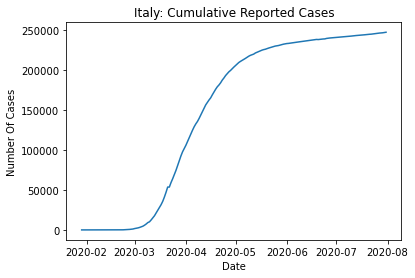

In [8]:
#Italy

italy = who_time_series[who_time_series['Country'] == 'Italy']

plt.plot(italy['Date_reported'], italy['Cumulative_cases'])
plt.title('Italy: Cumulative Reported Cases')
plt.xlabel('Date')
plt.ylabel('Number Of Cases')
plt.show()

Until March, the number of cumulative cases stays very low. But then the number starts to grow very fast (the line on the graph goes upwards very rapidly in March), and it maintains that fast pace until May. The growth then starts to settle down, and on the graph, we see an almost horizontal line.

## Logarithmic growth

Generally, a quantity that increases very quickly in the beginning — and then it slows down more and more over time — has a logarithmic growth.

In the March-July period (thus excluding January and February), Italy had a logarithmic growth in the number of cumulative cases because there were many new cases in the March-April period, but then the number of new cases started to decrease. The line on the graph will become perfectly horizontal when there will be no more new cases.

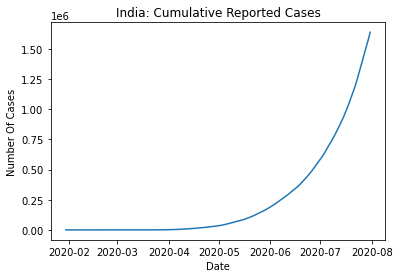

In [9]:
#India

india = who_time_series[who_time_series['Country'] == 'India']

plt.plot(india['Date_reported'], india['Cumulative_cases'])
plt.title('India: Cumulative Reported Cases')
plt.xlabel('Date')
plt.ylabel('Number Of Cases')
plt.show()

## Exponential growth

The number of cumulative cases increases very slowly in the February-May period (the line is almost horizontal). But then the growth becomes fast (the line rapidly switches direction upwards), and it gets faster and faster over time, without showing any sign of slowing down.

Generally, a quantity that increases slowly in the beginning — but then starts growing faster and faster over time — has exponential growth.

India shows exponential growth for the data we have.

If we look at Italy again, we can actually see an exponential growth too if we isolate only the February-May period. Overall, Italy has a slow growth in the beginning, followed by a fast growth in the March-May period, and then the growth slows down again. This sequence of growth rates is often described as logistic growth.

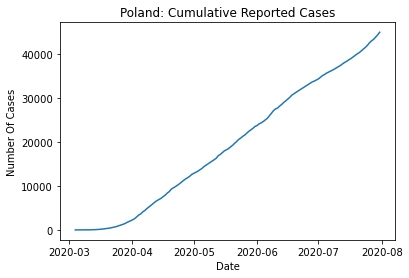

In [10]:
# Poland

poland = who_time_series[who_time_series['Country'] == 'Poland']

plt.plot(poland['Date_reported'], poland['Cumulative_cases'])
plt.title('Poland: Cumulative Reported Cases')
plt.xlabel('Date')
plt.ylabel('Number Of Cases')
plt.show()

## Linear growth

If we look at the April-July period, we can see an approximately straight line. There are a few variations here and there, but no obvious curves like we see for Italy or India. The number of cases increases nonetheless, but it increases at a constant rate.

Generally, a quantity that increases constantly over time has linear growth.

To sum up, these are the three types of growth we saw up until now

1. Logarithmic growth
2. Exponential growth
3. Linear growth




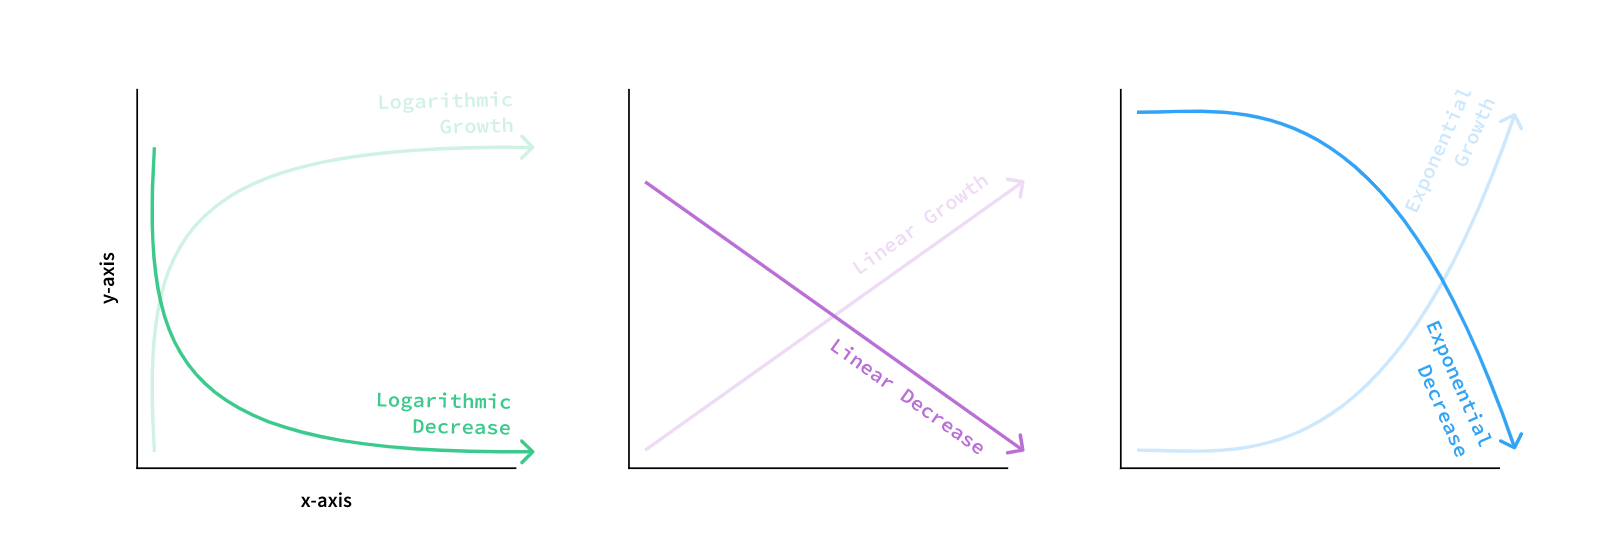

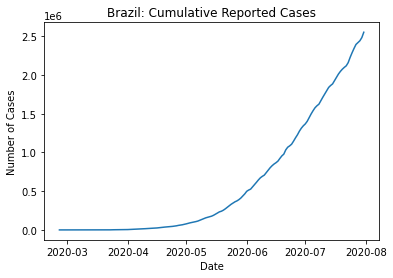

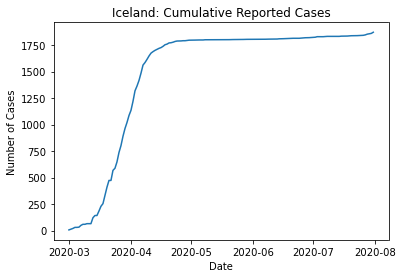

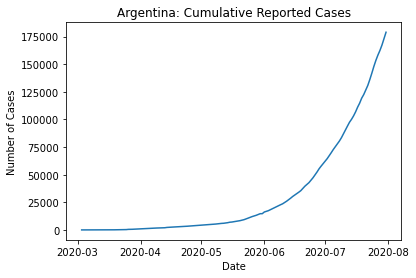

In [11]:
def plot_cumulative_cases(country_name):
    country = who_time_series[who_time_series['Country'] == country_name]
    plt.plot(country['Date_reported'], country['Cumulative_cases'])
    plt.title('{}: Cumulative Reported Cases'.format(country_name))
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.show()
    
plot_cumulative_cases('Brazil')
plot_cumulative_cases('Iceland')
plot_cumulative_cases('Argentina')


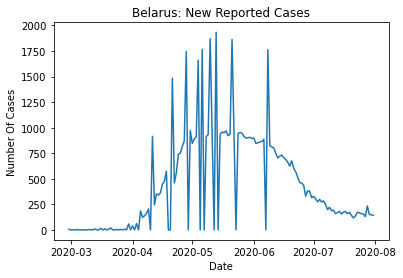

In [12]:
# Belarus

belarus = who_time_series[who_time_series['Country'] == 'Belarus']

plt.plot(belarus['Date_reported'], belarus['New_cases'])
plt.title('Belarus: New Reported Cases')
plt.xlabel('Date')
plt.ylabel('Number Of Cases')
plt.show()

In the April-July period, we see several spikes on the graph going either upward or downward. For some days, the number of new cases gets close to 2,000 (the upward spikes), while for others is zero (the downwards spikes). These large variations suggest that the reports didn't arrive daily — it may be that no one sent reports over the weekends or on national holidays. The number of new cases keeps increasing until the next report, and then we see one of those upward spikes.

When we see irregularities on a line graph, this doesn't mean we can't extract any meaning. By analyzing the irregularities, we can sometimes uncover interesting details.

## Comparing line graphs

One of the key elements of data exploration is comparison — how does this value compare to that other value? For our COVID-19 time series, we can formulate many questions in terms of comparison:

- How does the United Kingdom compare to France with respect to the evolution of cumulative new cases?
- How does Mexico compare to the United States with respect to the cummulative number of deaths?
- How does the evolution of new reported cases compare between India, Indonesia, and China?
- How does the evolution of total cases compare between Europe and Asia? Or between Africa and South America?

For instance, let's visualize the evolution of cumulative cases for France and the United Kingdom. 

Matplotlib allows us to have two line graphs sharing the same x- and y-axis.



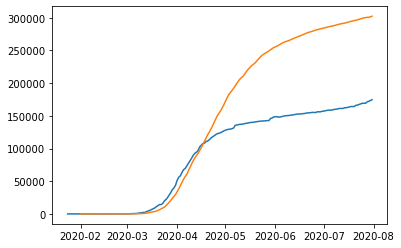

In [13]:
france = who_time_series[who_time_series['Country'] == 'France']
uk = who_time_series[who_time_series['Country'] == 'The United Kingdom']

plt.plot(france['Date_reported'], france['Cumulative_cases'])
plt.plot(uk['Date_reported'], uk['Cumulative_cases'])
plt.show()

## Add a legend

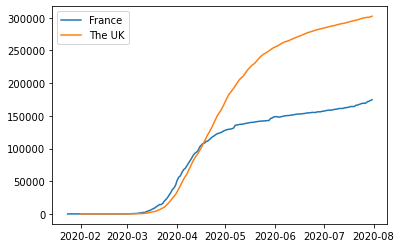

In [14]:
plt.plot(france['Date_reported'], france['Cumulative_cases'],
         label='France')
plt.plot(uk['Date_reported'], uk['Cumulative_cases'],
         label='The UK')
plt.legend()
plt.show()

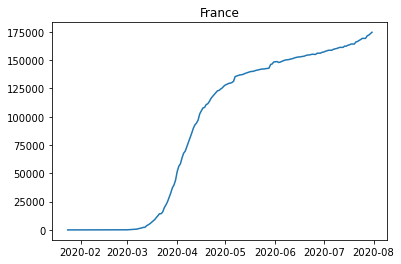

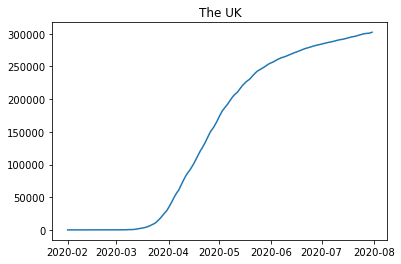

In [15]:
plt.plot(france['Date_reported'], france['Cumulative_cases'])
plt.title('France')
plt.show()

plt.plot(uk['Date_reported'], uk['Cumulative_cases'])
plt.title('The UK')
plt.show()

When we use plt.plot() the first time, Matplotlib creates a line graph. When we use plt.plot() again, Matplotlib creates another line graph that shares the same x- and y-axis as the first graph. If we want Matplotlib to draw the second line graph separately, we need to close the first graph with the plt.show() function.

Looking at the two graphs above, the evolution of cumulative cases looks very similar if we only judge by the shape of the line. If we look on the y-axis, however, we see that the two graphs have different ranges, and the values for the UK are almost twice as large. It's much easier to compare these two visualizations if they share the same axes.

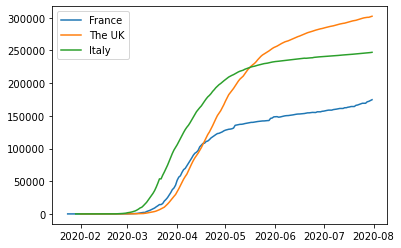

In [16]:
france = who_time_series[who_time_series['Country'] == 'France']
uk = who_time_series[who_time_series['Country'] == 'The United Kingdom']
italy = who_time_series[who_time_series['Country'] == 'Italy']

plt.plot(france['Date_reported'], france['Cumulative_cases'], label='France')
plt.plot(uk['Date_reported'], uk['Cumulative_cases'], label='The UK')
plt.plot(italy['Date_reported'], italy['Cumulative_cases'], label='Italy')
plt.legend()
plt.show()

greatest_july = 'The UK'
lowest_july = 'France'
increase_march = 'Italy'

## Learnings

- Plot and customize a line graph using Matplotlib
- Visualize time series with line graphs
- Interpret line plots by identifying types of change